# 1. Dataset description<a id='data-desc'></a>

This dataset consists of 11 features and a target variable. It has 6 nominal variables and 5 numeric variables. The detailed description of all the features are as follows:

**1. Age:** Patients Age in years (Numeric)<br>
**2. Sex:** Gender of patient (Male - 1, Female - 0) (Nominal)<br>
**3. Chest Pain Type:** Type of chest pain experienced by patient categorized into 1 typical, 2 typical angina, 3 non-        anginal pain, 4 asymptomatic (Nominal)<br>
**4. resting bp s:** Level of blood pressure at resting mode in mm/HG (Numerical)<br>
**5. serum cholestrol:** Serum cholestrol in mg/dl (Numeric)<br>
**6. fasting blood sugar > 120 mg/dl:** Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)<br>
**7. resting electrocardiographic results (values 0,1,2):** Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)<br>
**8. max heart rate achieved:** Maximum heart rate achieved (Numeric)<br>
**9. exercise angina:** Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)<br>
**10. oldpeak:** Exercise induced ST-depression in comparison with the state of rest (Numeric)<br>
**11. ST slope:** ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)<br>
**12. number of major vessels (0-3) colored by flourosopy**<br>
**13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect**<br>


#### Target variable
**14. output:** It is the output variable which we have to predict 1 means patient is suffering from heart risk and 0 means patient is normal.


# 2. Importing Libraries

In [156]:
# data wrangling & pre-processing
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Split Data into two parts Train and Test
from sklearn.model_selection import train_test_split

# Scale the Data and fit into orignal data
from sklearn.preprocessing import StandardScaler

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

#accuracy of a classification
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix

# classification_report
from sklearn.metrics import classification_report


# K-fold validation
from sklearn.model_selection import cross_val_score,cross_val_predict

# Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import GridSearchCV


# to ingone unnecessary warning
import warnings
warnings.filterwarnings('ignore')

# 3. Loading Data

loading the data with the help of pandas library

In [123]:
heart = pd.read_csv("C:/Users/kashy/heart.csv")
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 4. Exploratory Data Analysis (EDA) and Processing

In [124]:
heart.shape

(303, 14)

In this data there are '303' ROWS and '14' COLUMNS

In [125]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [126]:
# cheaking total number of Null values 
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There are no Null or Missing value present

In [127]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [128]:

output_temp = heart.output.value_counts()

print(output_temp)

1    165
0    138
Name: output, dtype: int64


 we can say this dataset is not imbalanced 

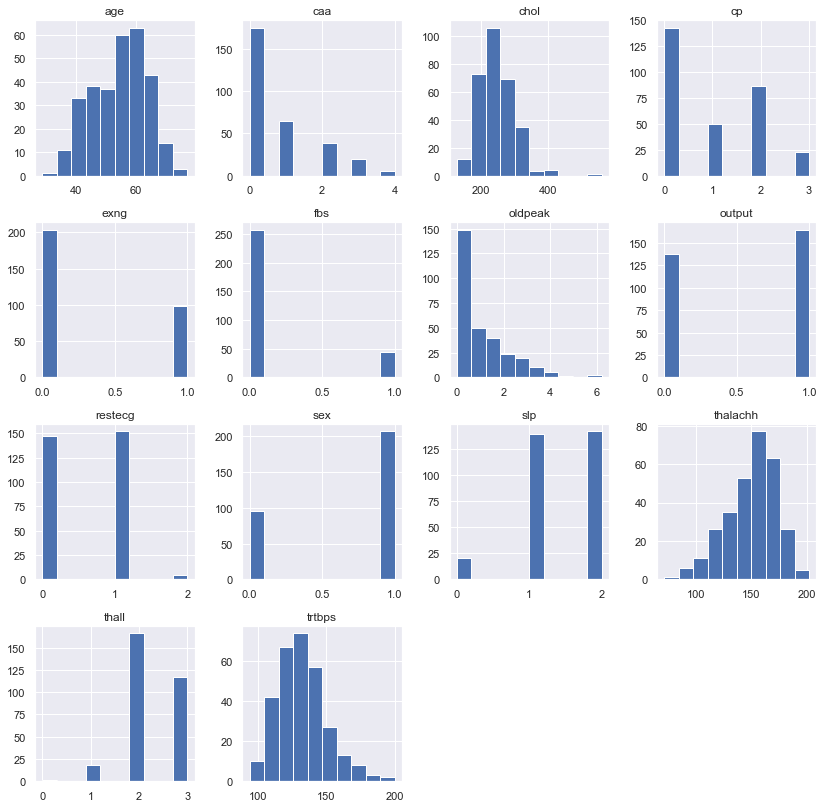

In [129]:
# This is a histogram
heart.hist(figsize=(14,14))
plt.show()

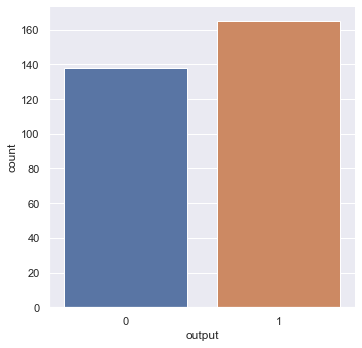

In [130]:
#Creating a factorplot, charting the number of 0 and 1
sns.catplot(x='output',data=heart,kind='count')

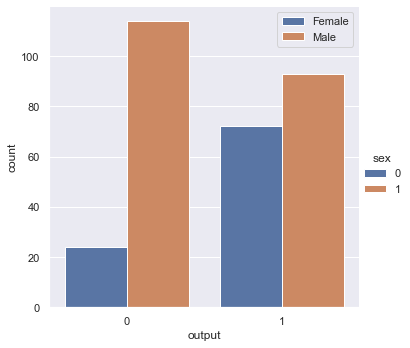

In [131]:
#Creating a factorplot, charting the number of male and female
sns.catplot(x='output',data=heart,hue='sex',kind='count')
plt.legend(labels=["Female","Male"])

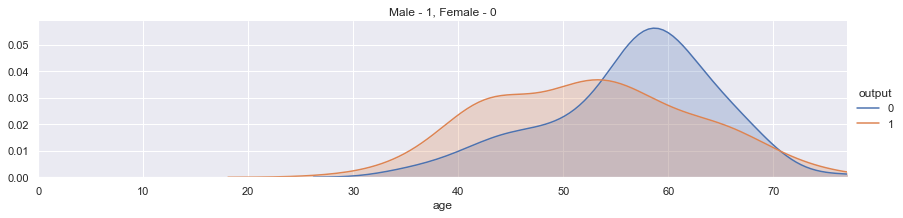

In [132]:
fig = sns.FacetGrid(heart,hue='output',aspect=4)

fig.map(sns.kdeplot,'age',shade=True)

oldest = heart['age'].max()

fig.set(xlim=(0,oldest))
plt.title('Male - 1, Female - 0')

fig.add_legend()

Male has more Heart risk cases in early Age

In [133]:
# creating separate df for normal and heart patients

attr_1=heart[heart['output']==1] # heart attack 'Yes'

attr_0=heart[heart['output']==0] # heart attack "NO"

m_1=heart[heart['sex']==1] #male

f_0=heart[heart['sex']==0] #Female

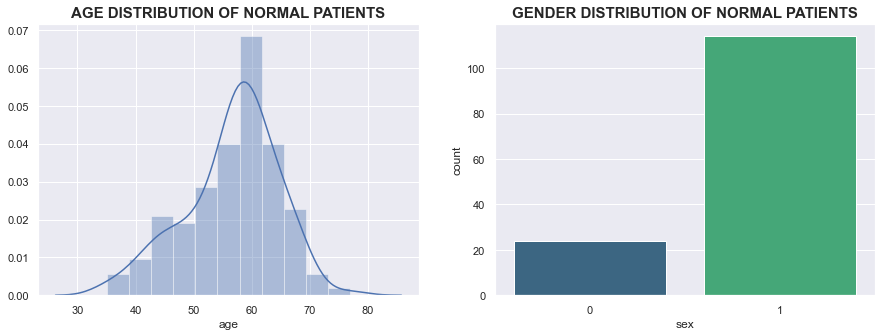

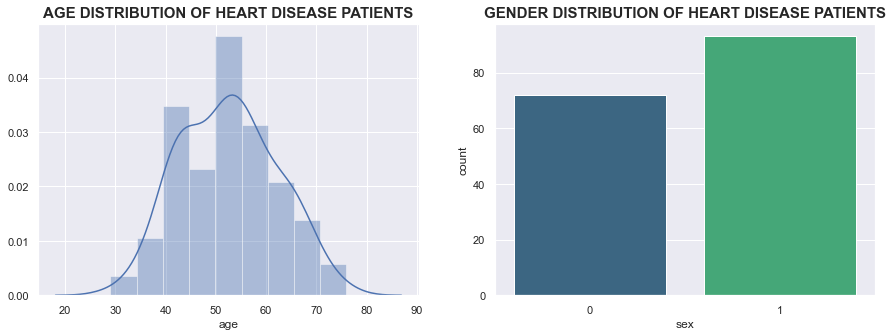

In [134]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

In this Plots We can see there are Males are facing more problems related to heart disease compair to Females.

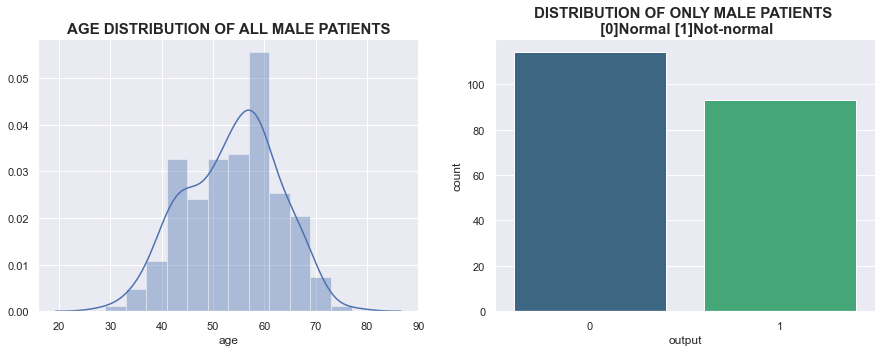

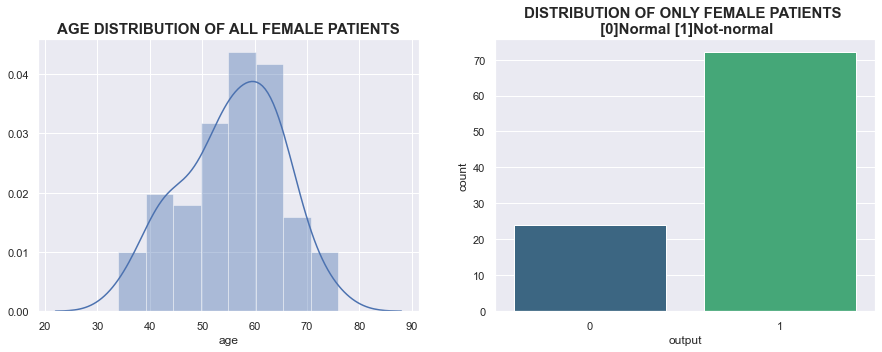

In [135]:
# plotting MALE patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(m_1['age'])
plt.title('AGE DISTRIBUTION OF ALL MALE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(m_1['output'], palette='viridis')
plt.title('DISTRIBUTION OF ONLY MALE PATIENTS \n [0]Normal [1]Not-normal', fontsize=15, weight='bold' )
plt.show()

#plotting FEMALE patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(f_0['age'])
plt.title('AGE DISTRIBUTION OF ALL FEMALE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(f_0['output'], palette='viridis')
plt.title('DISTRIBUTION OF ONLY FEMALE PATIENTS \n [0]Normal [1]Not-normal', fontsize=15, weight='bold' )
plt.show()

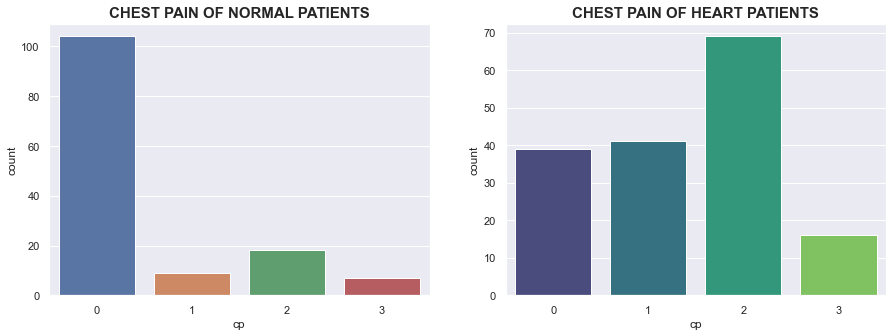

In [136]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['cp'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['cp'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

Type 0 Pain is very common type of pain in Normal Patiennts ------------------------------ Type 2 Pain is very common type of pain in Heart Patients

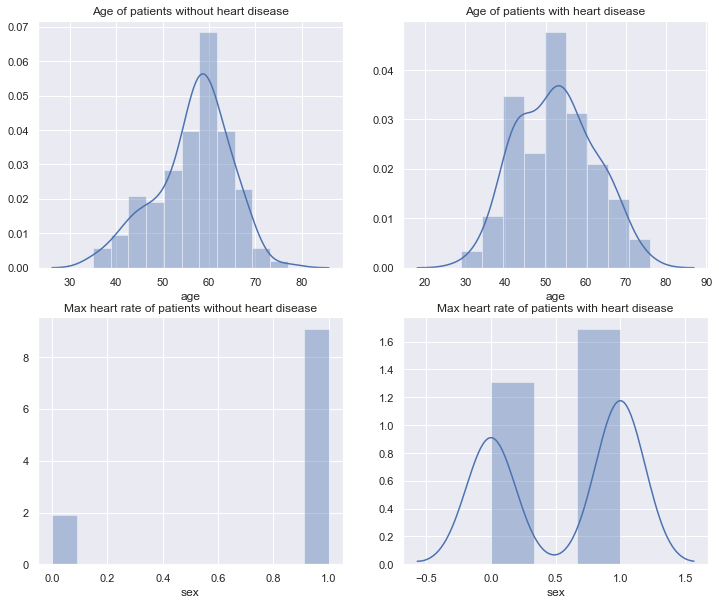

In [137]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(heart[heart['output']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(heart[heart['output']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(heart[heart['output']==0].sex )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(heart[heart['output']==1].sex )
plt.title('Max heart rate of patients with heart disease')
plt.show()

In [138]:
# create second DataFrame by droping target
heart_df2 = heart.drop(['output'], axis = 1)
print("The shape of 'heart_df2' is : ", heart_df2.shape)

The shape of 'heart_df2' is :  (303, 13)


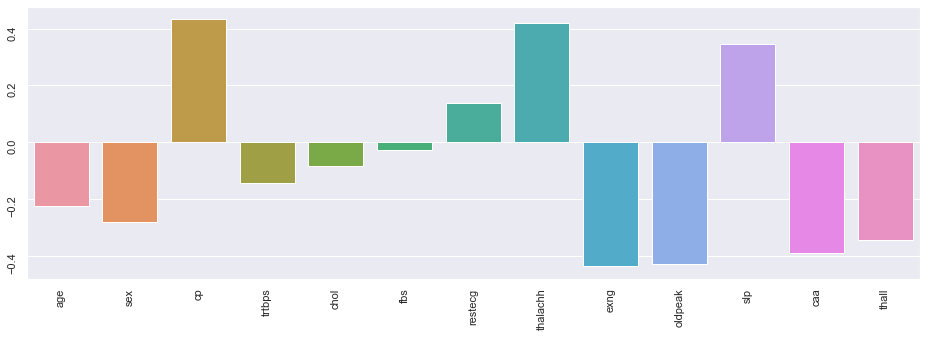

In [139]:
# visualize correlation barplot
plt.figure(figsize = (16,5))
ax = sns.barplot(heart_df2.corrwith(heart.output).index, heart_df2.corrwith(heart.output))
ax.tick_params(labelrotation = 90)

So, This barplot show tha Positive correlation and Negative correlation

In [140]:
# Create a Dummies Variable of Categorical variable
heart = pd.get_dummies(heart, columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'])

In [141]:
# Split data into Input and Output
X = heart.drop(['output'], axis=1)# Input Variables
Y = heart['output'] #Output valiable

In [142]:
# Scale the Data and fit into orignal data

standardScaler = StandardScaler()
columns_to_scale = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
heart[columns_to_scale] = standardScaler.fit_transform(X[columns_to_scale])
heart.head(4)

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0


In [143]:
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [144]:
# Drop the Output column
X_scaled = heart.drop(['output'], axis = 1) #Input Scaled Data 
X_scaled.head(3) 

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [145]:
# Split data into  Train and test , ratio 20-80
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=10)

In [146]:
X_train_n = X_train # X_train Data Without Scaled
X_test_n = X_test  # X_Test Data Without Scaled

In [147]:
# Scale the Data and fit into orignal data

standardScaler = StandardScaler()
columns_to_scale = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
X_train[columns_to_scale] = standardScaler.fit_transform(X_train[columns_to_scale]) # X_Treain Scaled Data
X_train.head()

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
188,-0.511133,0.417198,-0.228617,0.601053,-0.406908,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
275,-0.289083,-0.414582,-0.643200,0.833069,-0.080458,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
142,-1.399331,-0.691842,-0.702426,1.065085,-0.896583,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
104,-0.511133,-0.192774,-0.959073,0.601053,-0.896583,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
274,-0.844207,-1.246361,0.600550,-1.487091,-0.080458,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [148]:
# Scaling Data
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
X_test[columns_to_scale] = standardScaler.fit_transform(X_test[columns_to_scale]) # X_test Scaled Data
X_test.head()

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
237,0.673811,0.645768,0.792831,0.829827,0.305663,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
110,1.109455,3.138448,1.385419,0.206064,-0.926013,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
301,0.347079,0.022598,-2.207147,-1.314357,0.305663,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
149,-1.286585,0.022598,-1.299746,0.050124,-0.926013,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
214,0.238168,-0.288986,-0.021978,-0.183787,0.305663,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [149]:
# Total Rows and Cloumns 
print(X.shape, "Not Scaled Data and Not Splited")
print(Y.shape, "   Target Variable")
print(X_train.shape,X_test.shape, "Scaled and Splited Data 75-30   ('X_train')  ('X_test') ")
print(X_train_n.shape,X_test_n.shape, "Not Scaled Data but splited 75-30   ('X_train_n')  ('X_test_n') ")
print(Y_train.shape,Y_test.shape, "Taget Splited Data 75-30")

(303, 30) Not Scaled Data and Not Splited
(303,)    Target Variable
(212, 30) (91, 30) Scaled and Splited Data 75-30   ('X_train')  ('X_test') 
(212, 30) (91, 30) Not Scaled Data but splited 75-30   ('X_train_n')  ('X_test_n') 
(212,) (91,) Taget Splited Data 75-30


# Model Bulding -- Supervised Learning (Category)

# LogisticRegression

In [165]:
lr_sc = LogisticRegression(C=1, penalty='l2', solver='liblinear')
lr_sc.fit(X_train_n,Y_train)

LogisticRegression(C=1, solver='liblinear')

In [166]:
lr_pred_sc = model_lr.predict(X_test_n)
lr_test_data_sc_accuracy = accuracy_score(Y_test, lr_pred_sc)
lr_test_data_sc_accuracy

0.8571428571428571

In [150]:
# LogisticRegression model

model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)

LogisticRegression()

In [151]:
lr_pred = model_lr.predict(X_test)
lr_test_data_accuracy = accuracy_score(Y_test, lr_pred)

In [152]:
print("Model score is - ",model_lr.score(X_test, Y_test)) # Score of the data
print("Accuracy is - ",lr_test_data_accuracy) # accuracy_score
print("Mean square error is - ",mean_squared_error(Y_test, lr_pred)) # mean_squared_error score

Model score is -  0.8571428571428571
Accuracy is -  0.8571428571428571
Mean square error is -  0.14285714285714285


In [160]:
# Cross validation score

lr_score=cross_val_score(model_lr,X_scaled,Y,cv=10)
lr_score.mean()

0.8511827956989247

In [161]:
#classification_report

print(classification_report(Y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.86      0.88      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91



In [162]:
# confusion_matrix of cross validation
lr_cv_pred=cross_val_predict(model_lr,X_scaled,Y,cv=10)
lr_cm = confusion_matrix(Y, lr_cv_pred)
lr_cm

array([[113,  25],
       [ 20, 145]], dtype=int64)

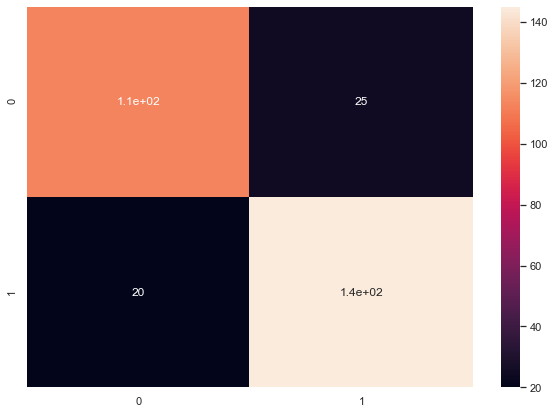

In [163]:
plt.figure(figsize=(10,7))
sns.heatmap(lr_cm, annot=True)
plt.show()

# Randomized Search Cv SVM-(SVC)

In [36]:
# Train classifiers.
kernel_values = [ 'linear' ,  'poly' ,  'rbf' ,  'sigmoid' ]
r_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6),'kernel': kernel_values}
svc=SVC()
svc_randomcv=RandomizedSearchCV(estimator=svc,param_distributions=r_grid,n_iter=100,cv=5,verbose=2,
                               random_state=10,n_jobs=-1)
### fit the randomized model
svc_randomcv.fit(X_train_n,Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.9s finished


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                        'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=10, verbose=2)

In [37]:
svc_randomcv.best_estimator_

SVC(C=10.0, gamma=0.001)

In [38]:
svc_randomcv.best_params_

{'kernel': 'rbf', 'gamma': 0.001, 'C': 10.0}

In [39]:
best_random_grid_svc=svc_randomcv.best_estimator_

In [40]:
y_pred_rcv_svc=best_random_grid_svc.predict(X_test)
rcv_svc_score = accuracy_score(Y_test,y_pred_rcv_svc)

In [41]:
print(confusion_matrix(Y_test,y_pred_rcv_svc))
print("Accuracy Score {}".format(accuracy_score(Y_test,y_pred_rcv_svc)))
print("Classification report: {}".format(classification_report(Y_test,y_pred_rcv_svc)))

[[33  8]
 [ 6 44]]
Accuracy Score 0.8461538461538461
Classification report:               precision    recall  f1-score   support

           0       0.85      0.80      0.83        41
           1       0.85      0.88      0.86        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



# Grid Search Cv SVM-(SVC)

In [42]:
# Train classifiers.
kernel_values = [ 'linear' ,  'poly' ,  'rbf' ,  'sigmoid' ]
param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6),'kernel': kernel_values}

svc_grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5,n_jobs=-1)
svc_grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [43]:
print("The best parameters are %s with a score of %0.2f"
      % (svc_grid.best_params_, svc_grid.best_score_))

The best parameters are {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'} with a score of 0.83


In [44]:
best_grid_svc=svc_grid.best_estimator_

In [45]:
y_pred_grid_svc=best_grid_svc.predict(X_test)
grid_svc_score = accuracy_score(Y_test,y_pred_grid_svc)

In [46]:
print(confusion_matrix(Y_test,y_pred_grid_svc))
print("Accuracy Score {}".format(accuracy_score(Y_test,y_pred_grid_svc)))
print("Classification report: {}".format(classification_report(Y_test,y_pred_grid_svc)))

[[31 10]
 [ 6 44]]
Accuracy Score 0.8241758241758241
Classification report:               precision    recall  f1-score   support

           0       0.84      0.76      0.79        41
           1       0.81      0.88      0.85        50

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



# Support Vector Machine SVM -- SVC

In [47]:
# Support Vector Machine model
model_svm=SVC(C=3)
model_svm.fit(X_train, Y_train)

SVC(C=3)

In [48]:
svm_test_pred = model_svm.predict(X_test)
svm_test_data_accuracy = accuracy_score(Y_test, svm_test_pred)

In [49]:
print("Model score is - ",model_svm.score(X_test, Y_test))
print("Accuracy is - ",svm_test_data_accuracy)
print("Mean square error is - ",mean_squared_error(Y_test, svm_test_pred))

Model score is -  0.7912087912087912
Accuracy is -  0.7912087912087912
Mean square error is -  0.2087912087912088


In [50]:
# Cross validation

svm_score=cross_val_score(model_svm,X_scaled,Y,cv=30)
svm_score.mean()

0.8309090909090909

In [51]:
# classification_report

print(classification_report(Y_test, svm_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        41
           1       0.82      0.80      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [52]:
# confusion_matrix

svm_cm = confusion_matrix(Y_test, svm_test_pred)
svm_cm

array([[32,  9],
       [10, 40]], dtype=int64)

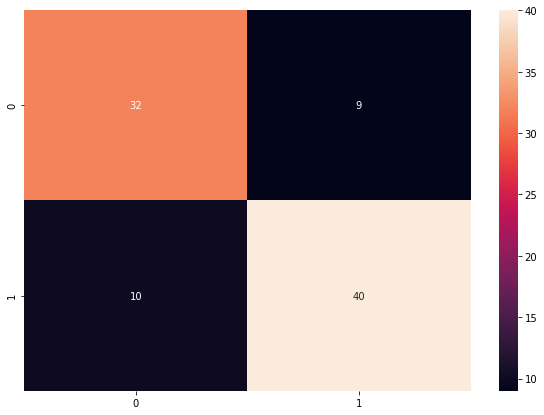

In [53]:
plt.figure(figsize=(10,7))
sns.heatmap(svm_cm, annot=True)
plt.show()

# DecissionTree

In [54]:
model_dt = DecisionTreeClassifier(criterion='entropy')
model_dt.fit(X_train_n, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [55]:
dt_pred = model_dt.predict(X_test_n)
dt_test_data_accuracy = accuracy_score(Y_test, dt_pred)

In [56]:
from sklearn.metrics import accuracy_score, mean_squared_error
print("Model score is - ",model_dt.score(X_test_n, Y_test))
print("Accuracy is - ",dt_test_data_accuracy)
print("Mean square error is - ",mean_squared_error(Y_test, dt_pred))

Model score is -  0.7142857142857143
Accuracy is -  0.7142857142857143
Mean square error is -  0.2857142857142857


In [57]:
# Cross validation
from sklearn.model_selection import cross_val_score

dt_score=cross_val_score(model_dt,X,Y,cv=30)
dt_score.mean()

0.7484848484848484

In [58]:
# classification_report
from sklearn.metrics import classification_report
print(classification_report(Y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        41
           1       0.74      0.74      0.74        50

    accuracy                           0.71        91
   macro avg       0.71      0.71      0.71        91
weighted avg       0.71      0.71      0.71        91



In [168]:
# confusion_matrix of cross validation
dt_cv_pred=cross_val_predict(model_dt,X,Y,cv=30)
dt_cm = confusion_matrix(Y, lr_cv_pred)
dt_cm

array([[113,  25],
       [ 20, 145]], dtype=int64)

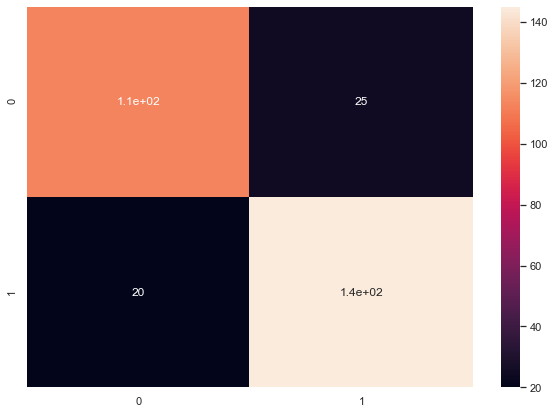

In [169]:
plt.figure(figsize=(10,7))
sns.heatmap(dt_cm, annot=True)
plt.show()

# Randomized Search Cv Random Forest

In [61]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100,10)]
# Minimum number of samples required to split a node
min_samples_split = [1,3,4, 5, 7,9]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]

In [62]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [10, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [1, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [63]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=10,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train_n,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   41.2s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 7, 9],
                                        'n_estimators': [10, 11, 13, 15, 17, 19,
                                                         21, 23, 25, 27, 29, 31,
                                                         33, 34, 36, 38, 40, 42,
                                                         44, 46, 48, 50, 52, 54,
                                                    

In [64]:
rf_randomcv.best_params_

{'n_estimators': 105,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 30,
 'criterion': 'entropy'}

In [65]:
rf_randomcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=105)

In [66]:
best_random_grid=rf_randomcv.best_estimator_

In [67]:
from sklearn.metrics import accuracy_score
y_pred_rcv=best_random_grid.predict(X_test_n)
rcv_rf_score = accuracy_score(Y_test,y_pred_rcv)

In [68]:
print(confusion_matrix(Y_test,y_pred_rcv))
print("Accuracy Score {}".format(accuracy_score(Y_test,y_pred_rcv)))
print("Classification report: {}".format(classification_report(Y_test,y_pred_rcv)))

[[34  7]
 [ 8 42]]
Accuracy Score 0.8351648351648352
Classification report:               precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



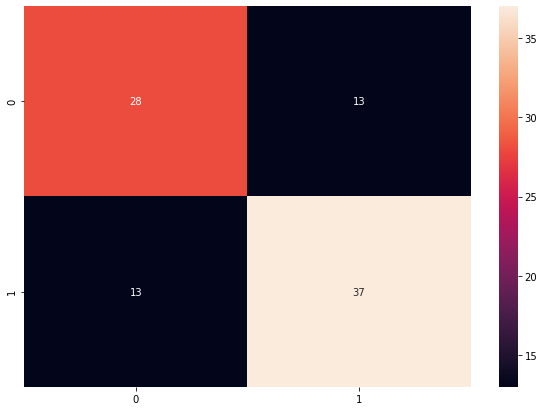

In [69]:
rcv_rt_cm = confusion_matrix(Y_test,y_pred_rcv)
rcv_rt_cm
plt.figure(figsize=(10,7))
sns.heatmap(dt_cm, annot=True)
plt.show()

# Grid SearchCV

In [70]:
rf_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

In [71]:
tree_clas = RandomForestClassifier(random_state=10)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=rf_grid, cv=3, verbose=True,n_jobs=-1)
grid_search.fit(X_train_n, Y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   38.5s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [72]:
grid_search.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2'}

In [73]:
best_rf_grid=grid_search.best_estimator_

In [74]:
y_pred_grid=best_rf_grid.predict(X_test_n)
grid_rf_score = accuracy_score(Y_test,y_pred_grid)

In [75]:
print(confusion_matrix(Y_test,y_pred_grid))
print("Accuracy Score {}".format(accuracy_score(Y_test,y_pred_grid)))
print("Classification report: {}".format(classification_report(Y_test,y_pred_grid)))

[[34  7]
 [10 40]]
Accuracy Score 0.8131868131868132
Classification report:               precision    recall  f1-score   support

           0       0.77      0.83      0.80        41
           1       0.85      0.80      0.82        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



# RandomForest

In [76]:
# RandomForestClassifier model

model_rf = RandomForestClassifier(criterion='entropy',n_estimators=100)
model_rf.fit(X_train_n, Y_train)

RandomForestClassifier(criterion='entropy')

In [77]:
rf_test_pred = model_rf.predict(X_test_n)
rf_test_data_accuracy = accuracy_score(Y_test, rf_test_pred)

In [78]:
print("Model score is - ",model_rf.score(X_test_n, Y_test))
print("Accuracy is - ",rf_test_data_accuracy)
print("Mean square error is - ",mean_squared_error(Y_test, rf_test_pred))

Model score is -  0.8131868131868132
Accuracy is -  0.8131868131868132
Mean square error is -  0.18681318681318682


In [79]:
# Cross validation

rf_score=cross_val_score(model_rf,X,Y,cv=10)
rf_cv_score = rf_score.mean()
rf_cv_score

0.821505376344086

In [80]:
# classification_report

print(classification_report(Y_test, rf_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        41
           1       0.85      0.80      0.82        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [170]:
# confusion_matrix of cross validation
rf_cv_pred=cross_val_predict(model_rf,X,Y,cv=30)
rf_cm = confusion_matrix(Y, rf_cv_pred)
rf_cm

array([[115,  23],
       [ 25, 140]], dtype=int64)

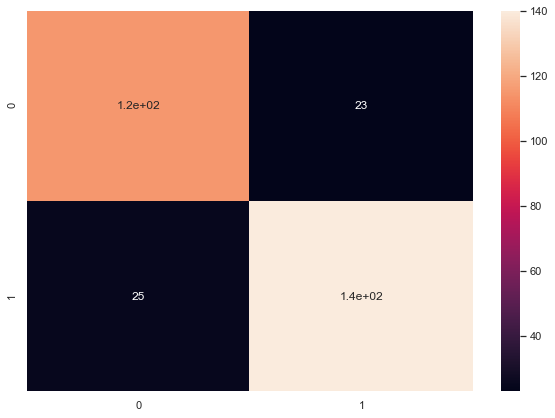

In [171]:
plt.figure(figsize=(10,7))
sns.heatmap(rf_cm, annot=True)
plt.show()


# K – Nearest Neighbor Classifier

In [83]:
# K – Nearest Neighbor Classifier
# Scaled
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [84]:
knn_pred = knn_classifier.predict(X_test)
knn_test_data_accuracy = accuracy_score(Y_test, knn_pred)

In [85]:
print("Model score is - ",knn_classifier.score(X_test, Y_test)) # Score of the data
print("Accuracy is - ",knn_test_data_accuracy) # accuracy_score
print("Mean square error is - ",mean_squared_error(Y_test, knn_pred)) # mean_squared_error score

Model score is -  0.7912087912087912
Accuracy is -  0.7912087912087912
Mean square error is -  0.2087912087912088


In [86]:
# Cross validation

knn_score=cross_val_score(knn_classifier,X_scaled,Y,cv=5)
knn_score.mean()

0.831584699453552

In [172]:
# confusion_matrix of cross validation
knn_cv_pred=cross_val_predict(knn_classifier,X_scaled,Y,cv=10)
knn_cm = confusion_matrix(Y, knn_cv_pred)
knn_cm

array([[109,  29],
       [ 21, 144]], dtype=int64)

In [87]:
# without scaled
knn_classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier2.fit(X_train_n, Y_train)
knn_pred2 = knn_classifier2.predict(X_test_n)
knn_test_data_accuracy2 = accuracy_score(Y_test, knn_pred2)
print("Model score is - ",knn_classifier2.score(X_test_n, Y_test)) # Score of the data
print("Accuracy is - ",knn_test_data_accuracy2) # accuracy_score
print("Mean square error is - ",mean_squared_error(Y_test, knn_pred2)) # mean_squared_error score

Model score is -  0.7912087912087912
Accuracy is -  0.7912087912087912
Mean square error is -  0.2087912087912088


In [88]:
# Cross validation

knn_score2=cross_val_score(knn_classifier2,X,Y,cv=5)
knn_score2.mean()

0.643879781420765

# Naive Bayes Classifier

In [89]:
# Naive Bayes Classifier

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

GaussianNB()

In [90]:
nb_pred = nb_classifier.predict(X_test)
nb_test_data_accuracy = accuracy_score(Y_test, nb_pred)
print("Model score is - ",nb_classifier.score(X_test, Y_test)) # Score of the data
print("Accuracy is - ",nb_test_data_accuracy) # accuracy_score
print("Mean square error is - ",mean_squared_error(Y_test, nb_pred)) # mean_squared_error score

Model score is -  0.8021978021978022
Accuracy is -  0.8021978021978022
Mean square error is -  0.1978021978021978


In [91]:
# Cross validation

nb_score=cross_val_score(nb_classifier,X_scaled,Y,cv=10)
nb_score.mean()

0.8018279569892475

In [92]:
print(classification_report(Y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



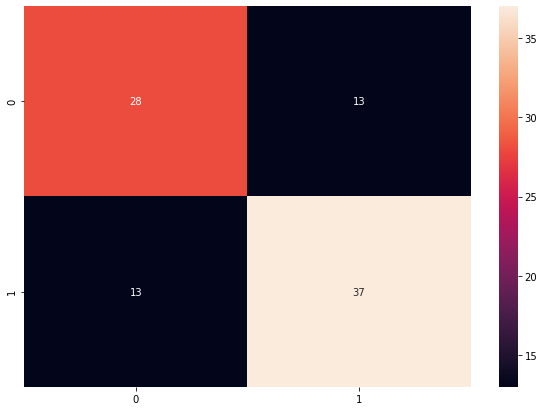

In [93]:
nb_cm = confusion_matrix(Y_test, nb_pred)
nb_cm
plt.figure(figsize=(10,7))
sns.heatmap(dt_cm, annot=True)
plt.show()

In [94]:
# whout scaling
nb_classifier2 = GaussianNB()
nb_classifier2.fit(X_train_n, Y_train)

GaussianNB()

In [95]:
nb_pred2 = nb_classifier2.predict(X_test_n)
nb_test_data_accuracy2 = accuracy_score(Y_test, nb_pred2)
print("Model score is - ",nb_classifier2.score(X_test_n, Y_test)) # Score of the data
print("Accuracy is - ",nb_test_data_accuracy2) # accuracy_score
print("Mean square error is - ",mean_squared_error(Y_test, nb_pred2)) # mean_squared_error score

Model score is -  0.8021978021978022
Accuracy is -  0.8021978021978022
Mean square error is -  0.1978021978021978


In [96]:
print(classification_report(Y_test, nb_pred2))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [97]:
# Cross validation

nb_score2=cross_val_score(nb_classifier2,X,Y,cv=10)
nb_score2.mean()

0.8051612903225808

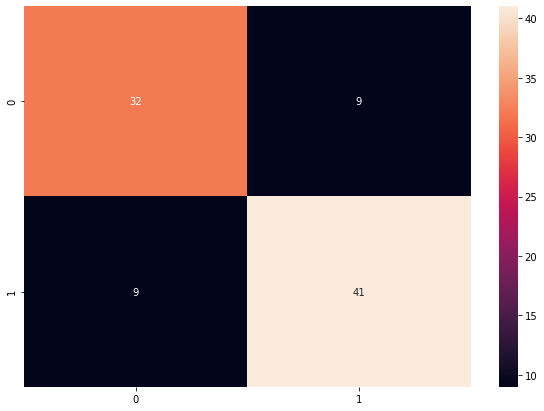

In [98]:
dt_cm = confusion_matrix(Y_test, nb_pred2)
dt_cm
plt.figure(figsize=(10,7))
sns.heatmap(dt_cm, annot=True)
plt.show()

# Adaboost Classifier

In [99]:
# Adaboost Classifier

adb_classifier = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state = 10),
                                    n_estimators=200,
                                    learning_rate=0.1,
                                    algorithm='SAMME.R',
                                    random_state=10)
adb_classifier.fit(X_train_n, Y_train)
Y_pred_adb = adb_classifier.predict(X_test_n)
accuracy_score(Y_test, Y_pred_adb)

0.7472527472527473

In [100]:
# Cross validation

rf_score=cross_val_score(adb_classifier,X,Y,cv=10)
rf_score.mean()

0.7419354838709677

# XGBoost Classifier

In [101]:
# XGBoost Classifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, Y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
xgb_score=accuracy_score(Y_test, y_pred_xgb)
print(xgb_score)

[00:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7912087912087912


In [102]:
# Cross validation

rf_score=cross_val_score(xgb_classifier,X_scaled,Y,cv=10)
rf_score.mean()

[00:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.8046236559139786

In [103]:
# XGBoost Classifier whout scaling

xgb_classifier2 = XGBClassifier()
xgb_classifier2.fit(X_train_n, Y_train)
y_pred_xgb2 = xgb_classifier2.predict(X_test_n)
accuracy_score(Y_test, y_pred_xgb2)

[00:48:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7912087912087912

In [104]:
# Cross validation

rf_score=cross_val_score(xgb_classifier2,X,Y,cv=10)
rf_score.mean()

[00:48:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.8046236559139786

In [105]:
scores = [lr_test_data_accuracy,nb_test_data_accuracy,svm_test_data_accuracy,rcv_svc_score,knn_test_data_accuracy,dt_test_data_accuracy,rf_cv_score,rcv_rf_score,xgb_score]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","RandomSearchcv SVC","K-Nearest Neighbors","Decision Tree","Random Forest cross validation","RandomSearchcv Ramdom forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using ----> "+algorithms[i]+" is: ----> "+str(scores[i]*100)+" %")

The accuracy score achieved using ----> Logistic Regression is: ----> 85.71428571428571 %
The accuracy score achieved using ----> Naive Bayes is: ----> 80.21978021978022 %
The accuracy score achieved using ----> Support Vector Machine is: ----> 79.12087912087912 %
The accuracy score achieved using ----> RandomSearchcv SVC is: ----> 84.61538461538461 %
The accuracy score achieved using ----> K-Nearest Neighbors is: ----> 79.12087912087912 %
The accuracy score achieved using ----> Decision Tree is: ----> 71.42857142857143 %
The accuracy score achieved using ----> Random Forest cross validation is: ----> 82.15053763440861 %
The accuracy score achieved using ----> RandomSearchcv Ramdom forest is: ----> 83.51648351648352 %
The accuracy score achieved using ----> XGBoost is: ----> 79.12087912087912 %


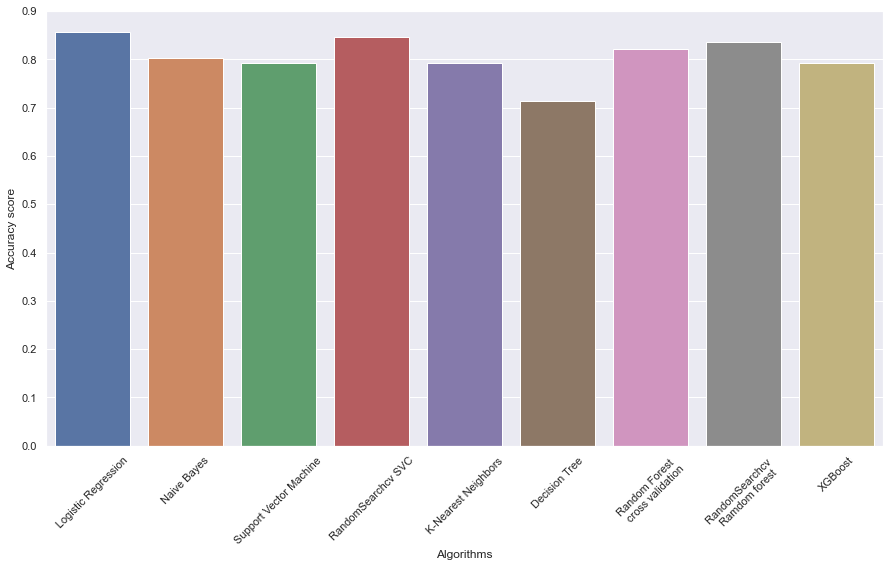

In [113]:
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","RandomSearchcv SVC","K-Nearest Neighbors","Decision Tree","Random Forest \n cross validation","RandomSearchcv \n Ramdom forest","XGBoost"]
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
# plt.ylim(0.7, 1)
plt.xticks(rotation=45)

sns.barplot(algorithms,scores)

In [120]:
# Scale the Score data to Easy visualization
a = []
for i in range(len(algorithms)):
    a.append(str((scores[i]*100)-85))

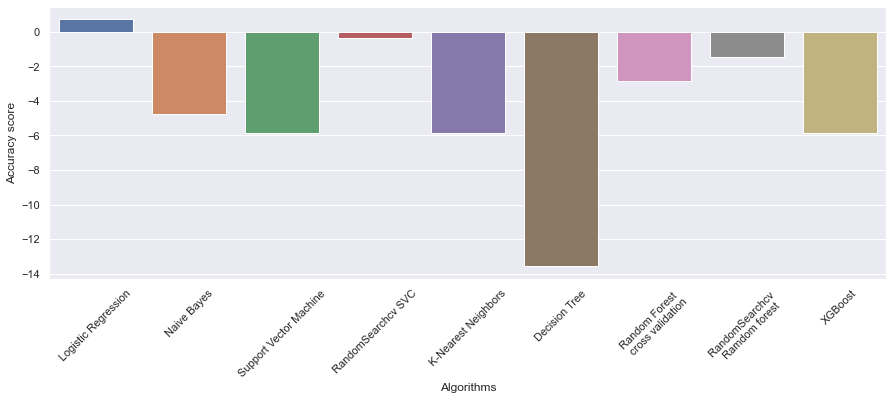

In [121]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.xticks(rotation=45)

sns.barplot(algorithms,a)

Only logistic Regression has more then 85% accuracy

In [109]:
# Logistic Regression
print(classification_report(Y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.86      0.88      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91



In [110]:
# Naive Bayes
print(classification_report(Y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [111]:
# classification_report SVM-(SVC)

print(classification_report(Y_test, svm_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        41
           1       0.82      0.80      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [112]:
# RandomSearchcv Ramdom forest
print(classification_report(Y_test,y_pred_rcv))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



### There is no fixed rule for separation training and testing data sets. Most of the researchers were used 70:30 ratio for separation data sets.